In [129]:
from pylab import *
%matplotlib inline

# Problema 1

Primero vamos a definir una función con el método de bipartición para encontrar las raíces

In [81]:
def raiz_bip(func,x_izq,x_der, err=1e-5): #(la función, punto ancla izquiero, punto ancla derecho, error)
    raiz = 0.5*(x_izq + x_der)
    y_izq, y_der = func(x_izq), func(x_der)
    n,nmax=0,500
    
    while abs(y_der) >=err and n <=nmax:
        y_medio = func(raiz)
        
        #Por si le atina a la raíz... (que es algo raro pero puede suceder)
        if y_medio == 0 :
            print "Le atiné a la raíz" 
            break 
        
        #Si no le atina a la raíz:
        if y_medio*y_izq < 0:
            x_der = raiz
        else:
            x_izq = raiz
        
        raiz = 0.5*(x_izq+x_der)
        y_izq,y_der = func(x_izq),func(x_der)
        n += 1 #Contador
        
    if n >= nmax or abs(func(raiz)) > err:
        return False #"No hay raiz en este intervalo"
    else:
        return raiz

La función de prueba que vamos a utilizar es: 

$$ y(x) = cos(x) + \frac{6}{5} sin(x^2) $$ 

En el intervalo $[0,2\pi]$

In [193]:
def func_p1(x):
    return cos(x) + (6./5.)*sin(x**2)


Ahora vamos a plotear nuestra función 'nomás' para ver por dónde andan los ceros y darnos una idea

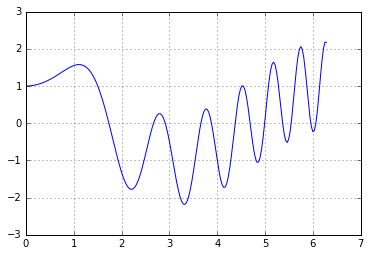

In [128]:
x=linspace(0,2*pi,200)
plot(x,func_p1(x))
grid(True)
show() 

Prueba para ver si nuestro método funciona: 
Vamos a buscar la raíz entre los intervalos: 

a) [0,1] (donde el resultado debe de ser "No hay raíz en este intervalo")

b) [2,3] (debería encontrar dos raíz entonces va a regresar error)

c) [4,4.5] (va a marcar que existe una raíz y ya )

In [64]:
raiz_bip(func_p1,0,1)

'No hay raiz en este intervalo'

In [69]:
raiz_bip(func_p1,2,3) #nota: no es que no exista la raíz... de hecho existen dos y entonces marca un error

'No hay raiz en este intervalo'

In [68]:
raiz_bip(func_p1,4,4.5)

4.373787879943848

Ahora, el problema es que esta fución es bastante quisquillosa, porque sólo nos da la raíz si le atinamos al intervalo en donde hay a lo mas una raíz... entonces claramente no nos vamos a poner a manualmente calcular cada una de las raíces. Entonces necesitamos una función que calcule cada una de las raíces y cuando encuentre una, la guarde en un array de raíces para que luego estén todas juntitas  y acomodadas. 

\footnote{La idea original de la función "raices_completo" es de Luis Yves}

In [161]:
def raices_completo(funcion, intervalo, N , err = 1e-5):
    
    #Intervalo en el que vamos a buscar las raices; intervalo es un array de dos entradas 
    x = linspace(intervalo[0], intervalo[1], N)
    #En la variable "raices" se van a almacenar todos los valores
    Raices = []

    while len(x):
        positivos = find(funcion(x)>0) 
        negativos = find(funcion(x)<0)
           
        if len(positivos) == 0 or len(negativos) == 0: 
            break # Quiere decir que la función es totalmente negativa o positiva (respectivamente)
            
        inicio = max(positivos[0], negativos[0])
        
        #haciendo uso de la funcion para calcular raices que ya tenemos
        raiz = raiz_bip(funcion,x[inicio-1], x[inicio], err) 
        if raiz != False:
            Raices += [raiz]
        x = x[inicio:] #paso mágico quita basura de Luis "Yvestruz" Yves 
    return Raices

los valores de las raices son:
[1.7337702228384908, 2.6680907484668843, 2.9117364243497681, 3.6574890855376969, 3.8785167350233234, 4.3737882556868737, 4.6872368023089521, 4.9902057163625368, 5.5454007704422965, 6.0621542852487602]


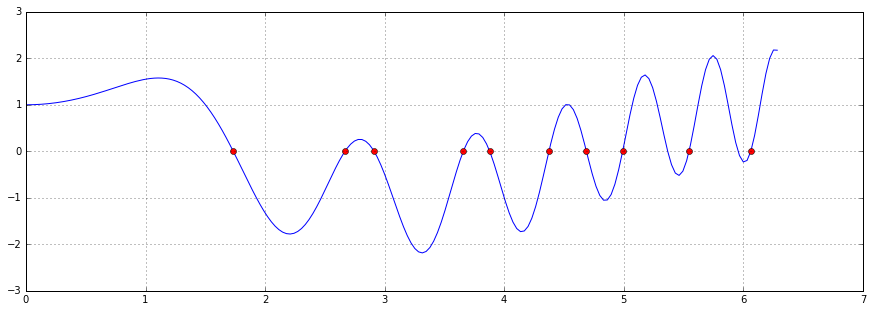

In [192]:
intervalo = [0., 2*pi]
print "los valores de las raices son:"
n = 200 
raices = raices_completo(func_p1,intervalo,n)
print raices
x = linspace(0, 2*pi, 200)
figure(figsize=(15,5))
plot(x, func_p1(x))
plot(raices, zeros_like(raices), 'ro')
grid()
show()